In [1]:
import numpy as np
import os
import glob
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from tqdm import tqdm
import manipulacion_midi
from sklearn.metrics import mean_squared_error, log_loss
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
tiempos_previos=5                        #NÚmero de tiempos previos utilizados para el entrenamiento y la prediccion
longitud_minima=15                       #Tamaño minimo (en tiempos) que deben tener las canciones del conjunto de entrenamiento
carpeta_canciones='../canciones_entrenamiento'  #Carpeta donde estan las canciones el entrenamiento
modelo_guardado='mejor_modelo_bosque.h5'        #Nombre del archivo donde se guardara el modelo entrenado
profundidad_arbol=100                     #Profundidad máxima de cada árbol individual
cantidad_arboles=5                        #Árboles que se crearan en el bosque

#Elimina los tiempos vacios antes de todas las canciones
def eliminar_zeros_iniciales(arr):
    i=0
    ceros=np.zeros_like(arr[0])
    tamano=np.size(arr,0)
    while np.array_equal(arr[i],ceros) and tamano!=1:
        arr=np.delete(arr,i, axis=0)
        tamano=tamano-1
    return arr

def leer_canciones(ruta):
    print('Cargando archivos...')
    archivos = glob.glob('{}/*.mid*'.format(ruta))
    archivos = np.array(np.sort(archivos))
    archivos = archivos.tolist()
    global canciones
    global numero_cancion
    canciones = []
    numero_cancion=0
    for f in tqdm(archivos):
        print(f)
        try:
            cancion = np.array(manipulacion_midi.midiToNoteStateMatrix(f))			#Convierte los archivos .mid a matrices 
            cancion=eliminar_zeros_iniciales(cancion)
            tam = np.array(cancion).shape[0]
            print(tam)
            if tam > longitud_minima:
                if(numero_cancion==0):
                    canciones=cancion
                    numero_cancion=numero_cancion+1
                else:
                    canciones= np.concatenate([canciones, cancion], axis=0)
                    numero_cancion=numero_cancion+1
        except Exception as e:
            raise e
    return canciones


In [3]:
#Cargar canciones
canciones = leer_canciones(carpeta_canciones)

print("Se cargaron {} canciones".format(numero_cancion))

Cargando archivos...


  0%|                                                                                           | 0/30 [00:00<?, ?it/s]

canciones\K19d Piano Sonata Duet.mid
1761


  3%|██▊                                                                                | 1/30 [00:02<01:18,  2.72s/it]

canciones\K279 Piano sonata n01 1mov.mid
2204


  7%|█████▌                                                                             | 2/30 [00:05<01:19,  2.83s/it]

canciones\K279 Piano sonata n01 3mov.mid
1708


 10%|████████▎                                                                          | 3/30 [00:08<01:13,  2.71s/it]

canciones\K281 Piano Sonata n03 1mov.mid
2516


 13%|███████████                                                                        | 4/30 [00:11<01:18,  3.01s/it]

canciones\K281 Piano Sonata n03 3mov.mid
2387


 17%|█████████████▊                                                                     | 5/30 [00:17<01:30,  3.62s/it]

canciones\K309 Piano Sonata n10 1mov.mid
4957


 20%|████████████████▌                                                                  | 6/30 [00:36<03:20,  8.35s/it]

canciones\K309 Piano Sonata n10 3mov.mid
2014


 23%|███████████████████▎                                                               | 7/30 [00:44<03:13,  8.42s/it]

canciones\K330 Piano Sonata n10 1mov.mid
2399


 27%|██████████████████████▏                                                            | 8/30 [00:53<03:08,  8.58s/it]

canciones\K330 Piano Sonata n10 3mov.mid
2731


 30%|████████████████████████▉                                                          | 9/30 [01:05<03:18,  9.45s/it]

canciones\K331 Piano sonata n11 3mov.mid
1785


 33%|███████████████████████████▎                                                      | 10/30 [01:08<02:33,  7.65s/it]

canciones\K333 Piano Sonata n13 1mov.mid
5281


 37%|██████████████████████████████                                                    | 11/30 [01:25<03:14, 10.22s/it]

canciones\K333 Piano Sonata n13 3mov.mid
3153


 40%|████████████████████████████████▊                                                 | 12/30 [01:34<03:00, 10.04s/it]

canciones\K358 Piano Sonata 4 Hands.mid
1777


 43%|███████████████████████████████████▌                                              | 13/30 [01:37<02:14,  7.90s/it]

canciones\K381 Piano Sonata 4 Hands.mid
1553


 47%|██████████████████████████████████████▎                                           | 14/30 [01:40<01:42,  6.40s/it]

canciones\K521 Piano Sonata 4 Hands.mid
3649


 50%|█████████████████████████████████████████                                         | 15/30 [01:46<01:35,  6.38s/it]

canciones\K545 Piano Sonata.mid
2369


 53%|███████████████████████████████████████████▋                                      | 16/30 [01:53<01:30,  6.44s/it]

canciones\K570 Piano Sonata 2mov.mid
1265


 57%|██████████████████████████████████████████████▍                                   | 17/30 [01:55<01:08,  5.27s/it]

canciones\K570 Piano Sonata 3mov.mid
1939


 60%|█████████████████████████████████████████████████▏                                | 18/30 [02:00<01:02,  5.19s/it]

canciones\Piano Sonata n01 K279.mid
1617


 63%|███████████████████████████████████████████████████▉                              | 19/30 [02:10<01:13,  6.64s/it]

canciones\Piano Sonata n03 K281.mid
1745


 67%|██████████████████████████████████████████████████████▋                           | 20/30 [02:20<01:15,  7.52s/it]

canciones\Piano Sonata n04 K282.mid
1153


 70%|█████████████████████████████████████████████████████████▍                        | 21/30 [02:27<01:05,  7.23s/it]

canciones\Piano Sonata n06 K284.mid
2033


 73%|████████████████████████████████████████████████████████████▏                     | 22/30 [02:39<01:11,  8.90s/it]

canciones\Piano Sonata n07 K309.mid
2481


 77%|██████████████████████████████████████████████████████████████▊                   | 23/30 [02:53<01:12, 10.39s/it]

canciones\Piano Sonata n08 K311.mid
3281


 80%|█████████████████████████████████████████████████████████████████▌                | 24/30 [03:12<01:16, 12.79s/it]

canciones\Piano Sonata n09 K310.mid
2129


 83%|████████████████████████████████████████████████████████████████████▎             | 25/30 [03:24<01:03, 12.67s/it]

canciones\Piano Sonata n10 K330.mid
2401


 87%|███████████████████████████████████████████████████████████████████████           | 26/30 [03:35<00:48, 12.08s/it]

canciones\Piano Sonata n13 K333.mid
2645


 90%|█████████████████████████████████████████████████████████████████████████▊        | 27/30 [03:52<00:40, 13.65s/it]

canciones\Piano Sonata n14 K457.mid
4897


 93%|████████████████████████████████████████████████████████████████████████████▌     | 28/30 [04:15<00:32, 16.43s/it]

canciones\Piano Sonata n15 K593-494.mid
3829


 97%|███████████████████████████████████████████████████████████████████████████████▎  | 29/30 [04:34<00:17, 17.27s/it]

canciones\Piano Sonata n16 K545.mid
1185


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [04:40<00:00, 13.78s/it]


Se cargaron 30 canciones


In [4]:
X=[]
y=[]
for i in range(0, len(canciones) - tiempos_previos):
    X.append(np.ravel(canciones[i: i + tiempos_previos]))
    y.append(canciones[i + tiempos_previos])

In [6]:
clf = RandomForestClassifier(max_depth=profundidad_arbol, n_estimators=cantidad_arboles)
clf = clf.fit(X, y)

joblib.dump(clf,modelo_guardado)		#Guarda el modelo generado en un archivo 'modelo_guardado'

['mejor_modelo.h5']

In [4]:
if os.path.isfile('./{}'.format(modelo_guardado)):
    clf = joblib.load(open(modelo_guardado, 'rb'))		#Carga el modelo entrenado
else:
    print('No existe el modelo')

In [8]:
#Evaluacion de modelo

#mean_squared_error(y, clf.predict(X)) 

log_loss(np.asarray(y), np.asarray(clf.predict(X)))


10.26166272021457

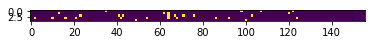

In [35]:
w = np.random.choice([0, 1], size=(tiempos_previos,156),  p=[0.95,0.05])
plt.imshow(w)

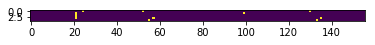

In [83]:
w=canciones[3600:3605,:]
plt.imshow(w)

In [84]:
#Generar nueva cancion

tamano_cancion=200         #Numero de tiempos que tendra la cancion generada

u = np.zeros((1, tiempos_previos, 156), dtype=np.int32)
tamano_cancion=tamano_cancion+tiempos_previos
cancion_base=w
ent=np.zeros((tamano_cancion,156))
ent[0:tiempos_previos,:]=cancion_base
for i in tqdm(range (0,tamano_cancion-tiempos_previos)):			#Creacion de la cancion
    nueva_fila = clf.predict(np.reshape(ent[i:i+tiempos_previos,:].ravel(),(1,tiempos_previos*156)))
    if (np.all(np.round_(nueva_fila)==0)):
        nueva_fila[0,np.argsort(-nueva_fila)[0,:4]]=1
    ent[i+tiempos_previos] = nueva_fila
    ent=np.round_(ent)

ent=ent[tiempos_previos:tamano_cancion+tiempos_previos,:]

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:14<00:00, 10.26it/s]


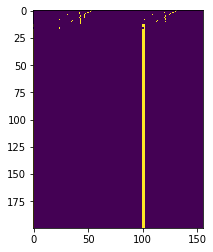

In [85]:
plt.imshow(ent)

In [86]:
manipulacion_midi.noteStateMatrixToMidi(ent, "./cancion_generada7")